## 相关性分析总结
- 目标：分析广告效果的五个指标与销售数据的相关性，从数据上说明我们用这五个指标衡量广告效果的合理性。
- 结果总结：1）天猫的相关性表现比京东好；2）天猫的一些指标有显著或中度线性关系，但也存在指标可以认为无线性关系；3）另外京东各指标基本都没有线性关系。
- 后续计划：当前相关性不是很显著的原因可能是因为数据中存在较多0值，或销售数据与广告投放存在时间上的滞后性等；计划把数据按一周或两周合并，再重新分析。
- 可能存在问题：京东数据目前的相关性很差，不知道是否与广告类型的合并有关。例如，海投、快车、直投这三部分广告都有广告小类的合并，具体如下:\
#dummy1=展位（京东展位）\
#dummy2=触点（购物触点）\
#dummy3=海投（PUSH海投，海投计划，海投新品，经典海投，首焦海投）\
#dummy4=快车（快车，京选店铺）\
#dummy5=其他（京东直投，直投）

## 读取数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import xlrd

In [3]:
data_jdhthz = pd.read_csv('京东各类海投.csv',encoding='gb18030')
data_jdcd = pd.read_csv('京东触点.csv',encoding='gb18030')
data_jdkchz = pd.read_csv('京东快车汇总.csv',encoding='gb18030')
data_jdzw = pd.read_csv('京东展位.csv',encoding='gb18030')
data_jdzt = pd.read_csv('京东直投.csv',encoding='gb18030')

In [4]:
data_tmcjtj = pd.read_csv('天猫超级推荐.csv',encoding='gb18030')
data_tmpxb = pd.read_csv('天猫品销宝.csv',encoding='gb18030')
data_tmztc = pd.read_csv('天猫直通车.csv',encoding='gb18030')
data_tmzz = pd.read_csv('天猫钻展.csv',encoding='gb18030')

In [5]:
type(data_jdzt)

pandas.core.frame.DataFrame

In [6]:
#sales_jd = pd.read_csv('1905-2103京东按周销售数据.csv',encoding='gb18030')
#sales_tmgq = pd.read_csv('1905-2103天猫官旗按周销售数据.csv',encoding='gb18030')
#sales_all = pd.read_csv('1909-2103销售数据.csv',encoding='gb18030')

In [25]:
# 用excel读入销售数据

In [30]:
data0 = xlrd.open_workbook('1905-2103天猫官旗按周销售数据.xls')
data1 = data0.sheet_by_index(0)

In [32]:
first_column = data1.col_values(0)
second_column = data1.col_values(1)

In [33]:
sales_tmgq = pd.DataFrame(first_column)
sales_tmgq['合计'] = second_column

In [34]:
sales_tmgq.columns = ['周次','合计']
sales_tmgq

周次     合计
0   2019-40   60.0
1   2019-41  153.0
2   2019-42  150.0
3   2019-43  133.0
4   2019-44  124.0
..      ...    ...
76  2021-10  958.0
77  2021-11  716.0
78  2021-12  667.0
79  2021-13  608.0
80  2021-14  352.0

[81 rows x 2 columns]

In [35]:
data3 = xlrd.open_workbook('1905-2103京东按周销售数据.xls')
data4 = data3.sheet_by_index(0)
column_1 = data4.col_values(0)
column_2 = data4.col_values(1)
sales_jd = pd.DataFrame(column_1)
sales_jd['合计'] = column_2
sales_jd.columns = ['周次','合计']
sales_jd

周次      合计
0   2019-21  2057.0
1   2019-22   863.0
2   2019-23   458.0
3   2019-24   664.0
4   2019-25  1380.0
..      ...     ...
95   2021-5  1001.0
96   2021-6  1372.0
97   2021-7   467.0
98   2021-8   970.0
99   2021-9  1876.0

[100 rows x 2 columns]

## 相关系数判断

 - -----------------------------
 - |r|<0.3 不存在线性关系
 - 0.3<|r|<0.5  低度线性关系
 - 0.5<|r|<0.8  显著线性关系
 - |r|>0.8  高度线性关系
 - ------------------------------

## 京东

### 京东海投汇总

In [9]:
data_jdhthz

年份  自然周       周次  广告形式     展现量   点击量   点击率  总加购数    转化率    ROI  ...  \
0   2019   19  2019-19  各类海投  765187  5406  0.71     0   0.09   0.39  ...   
1   2019   20  2019-20  各类海投  202972  2549  1.26     0   0.08   1.01  ...   
2   2019   21  2019-21  各类海投  134836  3134  2.32   319   4.02  50.02  ...   
3   2019   22  2019-22  各类海投   46738  1191  2.55   134   1.93  18.65  ...   
4   2019   23  2019-23  各类海投   46783   945  2.02   196   1.80  17.63  ...   
..   ...  ...      ...   ...     ...   ...   ...   ...    ...    ...  ...   
95  2021   10  2021-10  各类海投  470076  9571  2.04  4728   8.38  20.91  ...   
96  2021   11  2021-11  各类海投  434307  9287  2.14  4154   8.44  22.53  ...   
97  2021   12  2021-12  各类海投  353987  8108  2.29  3443   8.67  24.12  ...   
98  2021   13  2021-13  各类海投  246278  6112  2.48  2825  10.19  35.76  ...   
99  2021   14  2021-14  各类海投  101400  2344  2.31   941   9.34  30.38  ...   

    是否为展位广告  是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投    点击率/转化率       销售额/ROI  \
0         0        0        1        0        0   7.888889  16653.846150   
1         0        0        1        0        0  15.750000   6235.643564   
2         0        0        1        0        0   0.577114   5828.058776   
3         0        0        1        0        0   1.321244   2408.471850   
4         0        0        1        0        0   1.122222   2179.297788   
..      ...      ...      ...      ...      ...        ...           ...   
95        0        0        1        0        0   0.243437  37374.347200   
96        0        0        1        0        0   0.253555  36372.015090   
97        0        0        1        0        0   0.264129  27994.765750   
98        0        0        1        0        0   0.243376  20524.755310   
99        0        0        1        0        0   0.247323   7453.061224   

     点击量/展现量   加购数/点击量    订单数/加购数  
0   0.007065  0.000000   0.000000  
1   0.012558  0.000000   0.000000  
2   0.023243  0.101787   2.531746  
3   0.025482  0.112510   5.826087  
4   0.020200  0.207407  11.529412  
..       ...       ...        ...  
95  0.020361  0.493992   5.895262  
96  0.021383  0.447292   5.298469  
97  0.022905  0.424642   4.897582  
98  0.024817  0.462205   4.534510  
99  0.023116  0.401451   4.296804  

[100 rows x 23 columns]

In [10]:
sales_jd

周次    合计
0   2019-21  2057
1   2019-22   863
2   2019-23   458
3   2019-24   664
4   2019-25  1380
..      ...   ...
95   2021-5  1001
96   2021-6  1372
97   2021-7   467
98   2021-8   970
99   2021-9  1876

[100 rows x 2 columns]

In [11]:
sales = []
size = len(data_jdhthz)
for i in range(size):
    date_tmp = data_jdhthz['周次'][i]
    if date_tmp in list(sales_jd['周次']):
        index_tmp = sales_jd[sales_jd['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.NaN
    sales.append(sales_tmp)
sales_jdhthz = pd.DataFrame(sales)
data_jdhthz['销售数据'] = sales_jdhthz
data_jdhthz        

年份  自然周       周次  广告形式     展现量   点击量   点击率  总加购数    转化率    ROI  ...  \
0   2019   19  2019-19  各类海投  765187  5406  0.71     0   0.09   0.39  ...   
1   2019   20  2019-20  各类海投  202972  2549  1.26     0   0.08   1.01  ...   
2   2019   21  2019-21  各类海投  134836  3134  2.32   319   4.02  50.02  ...   
3   2019   22  2019-22  各类海投   46738  1191  2.55   134   1.93  18.65  ...   
4   2019   23  2019-23  各类海投   46783   945  2.02   196   1.80  17.63  ...   
..   ...  ...      ...   ...     ...   ...   ...   ...    ...    ...  ...   
95  2021   10  2021-10  各类海投  470076  9571  2.04  4728   8.38  20.91  ...   
96  2021   11  2021-11  各类海投  434307  9287  2.14  4154   8.44  22.53  ...   
97  2021   12  2021-12  各类海投  353987  8108  2.29  3443   8.67  24.12  ...   
98  2021   13  2021-13  各类海投  246278  6112  2.48  2825  10.19  35.76  ...   
99  2021   14  2021-14  各类海投  101400  2344  2.31   941   9.34  30.38  ...   

    是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投    点击率/转化率       销售额/ROI   点击量/展现量  \
0         0        1        0        0   7.888889  16653.846150  0.007065   
1         0        1        0        0  15.750000   6235.643564  0.012558   
2         0        1        0        0   0.577114   5828.058776  0.023243   
3         0        1        0        0   1.321244   2408.471850  0.025482   
4         0        1        0        0   1.122222   2179.297788  0.020200   
..      ...      ...      ...      ...        ...           ...       ...   
95        0        1        0        0   0.243437  37374.347200  0.020361   
96        0        1        0        0   0.253555  36372.015090  0.021383   
97        0        1        0        0   0.264129  27994.765750  0.022905   
98        0        1        0        0   0.243376  20524.755310  0.024817   
99        0        1        0        0   0.247323   7453.061224  0.023116   

     加购数/点击量    订单数/加购数    销售数据  
0   0.000000   0.000000     NaN  
1   0.000000   0.000000     NaN  
2   0.101787   2.531746  2057.0  
3   0.112510   5.826087   863.0  
4   0.207407  11.529412   458.0  
..       ...        ...     ...  
95  0.493992   5.895262  2391.0  
96  0.447292   5.298469  2374.0  
97  0.424642   4.897582  3185.0  
98  0.462205   4.534510  3437.0  
99  0.401451   4.296804  1068.0  

[100 rows x 24 columns]

In [12]:
data_jdhthz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   年份       100 non-null    int64  
 1   自然周      100 non-null    int64  
 2   周次       100 non-null    object 
 3   广告形式     100 non-null    object 
 4   展现量      100 non-null    int64  
 5   点击量      100 non-null    int64  
 6   点击率      100 non-null    float64
 7   总加购数     100 non-null    int64  
 8   转化率      100 non-null    float64
 9   ROI      100 non-null    float64
 10  总订单行     100 non-null    int64  
 11  总订单金额    100 non-null    float64
 12  总费用      100 non-null    float64
 13  是否为展位广告  100 non-null    int64  
 14  是否为触点广告  100 non-null    int64  
 15  是否为海投广告  100 non-null    int64  
 16  是否为快车广告  100 non-null    int64  
 17  是否为京东直投  100 non-null    int64  
 18  点击率/转化率  100 non-null    float64
 19  销售额/ROI  100 non-null    float64
 20  点击量/展现量  100 non-null    float64
 21  加购数/点击量  100 non-

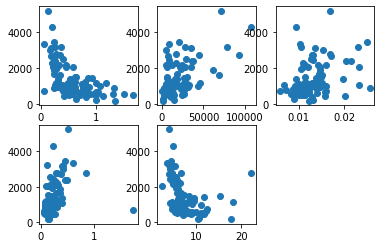

In [13]:
x1 = data_jdhthz['点击率/转化率']
x2 = data_jdhthz['销售额/ROI']
x3 = data_jdhthz['点击量/展现量']
x4 = data_jdhthz['加购数/点击量']
x5 = data_jdhthz['订单数/加购数']
y = data_jdhthz['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [14]:
jdhthz = data_jdhthz.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdhthz['点击率/转化率'])
xs.append(jdhthz['销售额/ROI'])
xs.append(jdhthz['点击量/展现量'])
xs.append(jdhthz['加购数/点击量'])
xs.append(jdhthz['订单数/加购数'])
ys = jdhthz['销售数据']

In [15]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.573，p值 =  0.000
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.580，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.336，p值 =  0.001
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.371，p值 =  0.000
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.328，p值 =  0.001


- p值都小于0.05，且都具有低度或中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000 -0.293818 -0.112312 -0.495472  0.549163 -0.572956
销售额/ROI -0.293818  1.000000  0.033083  0.125214 -0.099805  0.580169
点击量/展现量 -0.112312  0.033083  1.000000  0.367897 -0.151858  0.335874
加购数/点击量 -0.495472  0.125214  0.367897  1.000000 -0.015444  0.371203
订单数/加购数  0.549163 -0.099805 -0.151858 -0.015444  1.000000 -0.328017
销售数据    -0.572956  0.580169  0.335874  0.371203 -0.328017  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

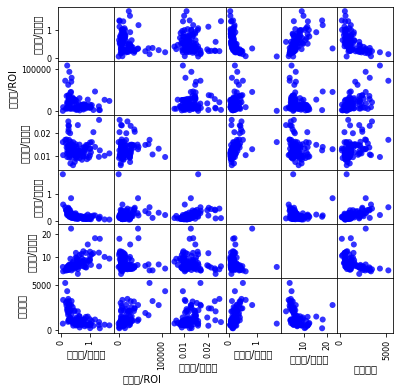

In [16]:
# 多维数据相关性分析
# 导入数据
df = jdhthz[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东快车汇总

In [17]:
data_jdkchz

年份  自然周       周次  广告形式      展现量    点击量   点击率  总加购数   转化率    ROI  ...  \
0   2019   19  2019-19  快车汇总   840763   6544  0.78   111  0.02   0.04  ...   
1   2019   20  2019-20  快车汇总  2720809  21233  0.78   467  0.06   0.12  ...   
2   2019   21  2019-21  快车汇总  1482510  17040  1.15  2416  2.98   7.20  ...   
3   2019   22  2019-22  快车汇总   296463   7011  2.36  1549  3.74   4.70  ...   
4   2019   23  2019-23  快车汇总   195707   4771  2.44  1154  2.75   3.59  ...   
..   ...  ...      ...   ...      ...    ...   ...   ...   ...    ...  ...   
95  2021   10  2021-10  快车汇总   195865   4985  2.55  2119  6.26  12.48  ...   
96  2021   11  2021-11  快车汇总   116208   4176  3.59  1642  5.96  11.83  ...   
97  2021   12  2021-12  快车汇总   137242   4370  3.18  1932  6.86  14.76  ...   
98  2021   13  2021-13  快车汇总    98092   3720  3.79  1603  6.75  16.20  ...   
99  2021   14  2021-14  快车汇总    39613   1457  3.68   591  6.04  10.63  ...   

    是否为展位广告  是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投    点击率/转化率       销售额/ROI  \
0         0        0        0        1        0  39.000000   32475.00000   
1         0        0        0        1        0  13.000000  140308.33330   
2         0        0        0        1        0   0.385906  160275.27780   
3         0        0        0        1        0   0.631016  124538.08510   
4         0        0        0        1        0   0.887273   81762.11699   
..      ...      ...      ...      ...      ...        ...           ...   
95        0        0        0        1        0   0.407348   31142.94872   
96        0        0        0        1        0   0.602349   29206.33981   
97        0        0        0        1        0   0.463557   26352.94715   
98        0        0        0        1        0   0.561481   23614.55741   
99        0        0        0        1        0   0.609272   10093.69708   

     点击量/展现量   加购数/点击量     订单数/加购数  
0   0.007783  0.016962  111.000000  
1   0.007804  0.021994   35.923077  
2   0.011494  0.141784    4.755906  
3   0.023649  0.220939    5.912214  
4   0.024378  0.241878    8.809160  
..       ...       ...         ...  
95  0.025451  0.425075    6.791667  
96  0.035936  0.393199    6.594378  
97  0.031842  0.442105    6.440000  
98  0.037924  0.430914    6.386454  
99  0.036781  0.405628    6.715909  

[100 rows x 23 columns]

In [18]:
sales = []
size = len(data_jdkchz)
for i in range(size):
    date_tmp = data_jdkchz['周次'][i]
    if date_tmp in list(sales_jd['周次']):
        index_tmp = sales_jd[sales_jd['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdkchz = pd.DataFrame(sales)
data_jdkchz['销售数据'] = sales_jdkchz
data_jdkchz   

年份  自然周       周次  广告形式      展现量    点击量   点击率  总加购数   转化率    ROI  ...  \
0   2019   19  2019-19  快车汇总   840763   6544  0.78   111  0.02   0.04  ...   
1   2019   20  2019-20  快车汇总  2720809  21233  0.78   467  0.06   0.12  ...   
2   2019   21  2019-21  快车汇总  1482510  17040  1.15  2416  2.98   7.20  ...   
3   2019   22  2019-22  快车汇总   296463   7011  2.36  1549  3.74   4.70  ...   
4   2019   23  2019-23  快车汇总   195707   4771  2.44  1154  2.75   3.59  ...   
..   ...  ...      ...   ...      ...    ...   ...   ...   ...    ...  ...   
95  2021   10  2021-10  快车汇总   195865   4985  2.55  2119  6.26  12.48  ...   
96  2021   11  2021-11  快车汇总   116208   4176  3.59  1642  5.96  11.83  ...   
97  2021   12  2021-12  快车汇总   137242   4370  3.18  1932  6.86  14.76  ...   
98  2021   13  2021-13  快车汇总    98092   3720  3.79  1603  6.75  16.20  ...   
99  2021   14  2021-14  快车汇总    39613   1457  3.68   591  6.04  10.63  ...   

    是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投    点击率/转化率       销售额/ROI   点击量/展现量  \
0         0        0        1        0  39.000000   32475.00000  0.007783   
1         0        0        1        0  13.000000  140308.33330  0.007804   
2         0        0        1        0   0.385906  160275.27780  0.011494   
3         0        0        1        0   0.631016  124538.08510  0.023649   
4         0        0        1        0   0.887273   81762.11699  0.024378   
..      ...      ...      ...      ...        ...           ...       ...   
95        0        0        1        0   0.407348   31142.94872  0.025451   
96        0        0        1        0   0.602349   29206.33981  0.035936   
97        0        0        1        0   0.463557   26352.94715  0.031842   
98        0        0        1        0   0.561481   23614.55741  0.037924   
99        0        0        1        0   0.609272   10093.69708  0.036781   

     加购数/点击量     订单数/加购数    销售数据  
0   0.016962  111.000000     NaN  
1   0.021994   35.923077     NaN  
2   0.141784    4.755906  2057.0  
3   0.220939    5.912214   863.0  
4   0.241878    8.809160   458.0  
..       ...         ...     ...  
95  0.425075    6.791667  2391.0  
96  0.393199    6.594378  2374.0  
97  0.442105    6.440000  3185.0  
98  0.430914    6.386454  3437.0  
99  0.405628    6.715909  1068.0  

[100 rows x 24 columns]

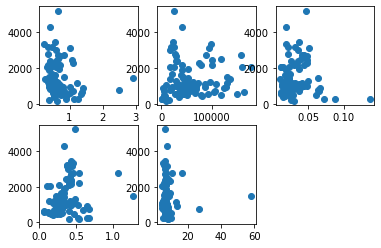

In [19]:
x1 = data_jdkchz['点击率/转化率']
x2 = data_jdkchz['销售额/ROI']
x3 = data_jdkchz['点击量/展现量']
x4 = data_jdkchz['加购数/点击量']
x5 = data_jdkchz['订单数/加购数']
y = data_jdkchz['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [20]:
jdkchz = data_jdkchz.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdkchz['点击率/转化率'])
xs.append(jdkchz['销售额/ROI'])
xs.append(jdkchz['点击量/展现量'])
xs.append(jdkchz['加购数/点击量'])
xs.append(jdkchz['订单数/加购数'])
ys = jdkchz['销售数据']

In [21]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.180，p值 =  0.077
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.069，p值 =  0.500
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.004，p值 =  0.969
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.244，p值 =  0.016
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.007，p值 =  0.943


- 虽然有四项的p值都小于0.05，但没有明显相关关系

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.119763  0.472408  0.404040  0.776404 -0.179773
销售额/ROI  0.119763  1.000000 -0.315593 -0.332087 -0.007393  0.068962
点击量/展现量  0.472408 -0.315593  1.000000  0.668807  0.249650  0.003937
加购数/点击量  0.404040 -0.332087  0.668807  1.000000  0.637000  0.243753
订单数/加购数  0.776404 -0.007393  0.249650  0.637000  1.000000 -0.007278
销售数据    -0.179773  0.068962  0.003937  0.243753 -0.007278  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

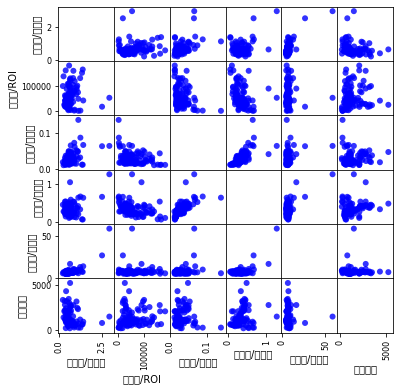

In [22]:
# 多维数据相关性分析
# 导入数据
df = jdkchz[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东触点

In [23]:
data_jdcd

年份  自然周       周次  广告形式     展现量   点击量   点击率  总加购数   转化率    ROI  ...  \
0   2019   19  2019-19  购物触点  155311  1181  0.76    28  0.00   0.00  ...   
1   2019   20  2019-20  购物触点  233858  1307  0.56    38  0.00   0.00  ...   
2   2019   21  2019-21  购物触点  112767   682  0.60    77  1.76  10.06  ...   
3   2019   22  2019-22  购物触点   12205    95  0.78    18  2.11  18.52  ...   
4   2019   23  2019-23  购物触点   10795    99  0.92    12  2.02  25.11  ...   
..   ...  ...      ...   ...     ...   ...   ...   ...   ...    ...  ...   
90  2021   10  2021-10  购物触点  409864  2151  0.52   882  4.09  11.36  ...   
91  2021   11  2021-11  购物触点  199960  1775  0.89   441  4.34  13.15  ...   
92  2021   12  2021-12  购物触点  259917  2619  1.01   684  3.63  12.96  ...   
93  2021   13  2021-13  购物触点  198982  2159  1.09   646  4.77  17.50  ...   
94  2021   14  2021-14  购物触点  110709  1024  0.92   217  2.93   7.09  ...   

    是否为展位广告  是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投   点击率/转化率      销售额/ROI  \
0         0        1        0        0        0  0.000000     0.000000   
1         0        1        0        0        0  0.000000     0.000000   
2         0        1        0        0        0  0.340909  2583.300199   
3         0        1        0        0        0  0.369668   168.358531   
4         0        1        0        0        0  0.455446   159.219435   
..      ...      ...      ...      ...      ...       ...          ...   
90        0        1        0        0        0  0.127139  8983.010563   
91        0        1        0        0        0  0.205069  6914.828897   
92        0        1        0        0        0  0.278237  9911.728395   
93        0        1        0        0        0  0.228512  8746.000000   
94        0        1        0        0        0  0.313993  4380.112835   

     点击量/展现量   加购数/点击量    订单数/加购数  
0   0.007604  0.023709   0.000000  
1   0.005589  0.029074   0.000000  
2   0.006048  0.112903   6.416667  
3   0.007784  0.189474   9.000000  
4   0.009171  0.121212   6.000000  
..       ...       ...        ...  
90  0.005248  0.410042  10.022727  
91  0.008877  0.248451   5.727273  
92  0.010076  0.261168   7.200000  
93  0.010850  0.299213   6.271845  
94  0.009249  0.211914   7.233333  

[95 rows x 23 columns]

In [25]:
sales = []
size = len(data_jdcd)
for i in range(size):
    date_tmp = data_jdcd['周次'][i]
    if date_tmp in list(sales_jd['周次']):
        index_tmp = sales_jd[sales_jd['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdcd = pd.DataFrame(sales)
data_jdcd['销售数据'] = sales_jdcd
data_jdcd  

年份  自然周       周次  广告形式     展现量   点击量   点击率  总加购数   转化率    ROI  ...  \
0   2019   19  2019-19  购物触点  155311  1181  0.76    28  0.00   0.00  ...   
1   2019   20  2019-20  购物触点  233858  1307  0.56    38  0.00   0.00  ...   
2   2019   21  2019-21  购物触点  112767   682  0.60    77  1.76  10.06  ...   
3   2019   22  2019-22  购物触点   12205    95  0.78    18  2.11  18.52  ...   
4   2019   23  2019-23  购物触点   10795    99  0.92    12  2.02  25.11  ...   
..   ...  ...      ...   ...     ...   ...   ...   ...   ...    ...  ...   
90  2021   10  2021-10  购物触点  409864  2151  0.52   882  4.09  11.36  ...   
91  2021   11  2021-11  购物触点  199960  1775  0.89   441  4.34  13.15  ...   
92  2021   12  2021-12  购物触点  259917  2619  1.01   684  3.63  12.96  ...   
93  2021   13  2021-13  购物触点  198982  2159  1.09   646  4.77  17.50  ...   
94  2021   14  2021-14  购物触点  110709  1024  0.92   217  2.93   7.09  ...   

    是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投   点击率/转化率      销售额/ROI   点击量/展现量  \
0         1        0        0        0  0.000000     0.000000  0.007604   
1         1        0        0        0  0.000000     0.000000  0.005589   
2         1        0        0        0  0.340909  2583.300199  0.006048   
3         1        0        0        0  0.369668   168.358531  0.007784   
4         1        0        0        0  0.455446   159.219435  0.009171   
..      ...      ...      ...      ...       ...          ...       ...   
90        1        0        0        0  0.127139  8983.010563  0.005248   
91        1        0        0        0  0.205069  6914.828897  0.008877   
92        1        0        0        0  0.278237  9911.728395  0.010076   
93        1        0        0        0  0.228512  8746.000000  0.010850   
94        1        0        0        0  0.313993  4380.112835  0.009249   

     加购数/点击量    订单数/加购数    销售数据  
0   0.023709   0.000000     NaN  
1   0.029074   0.000000     NaN  
2   0.112903   6.416667  2057.0  
3   0.189474   9.000000   863.0  
4   0.121212   6.000000   458.0  
..       ...        ...     ...  
90  0.410042  10.022727  2391.0  
91  0.248451   5.727273  2374.0  
92  0.261168   7.200000  3185.0  
93  0.299213   6.271845  3437.0  
94  0.211914   7.233333  1068.0  

[95 rows x 24 columns]

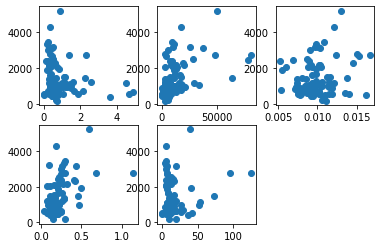

In [26]:
x1 = data_jdcd['点击率/转化率']
x2 = data_jdcd['销售额/ROI']
x3 = data_jdcd['点击量/展现量']
x4 = data_jdcd['加购数/点击量']
x5 = data_jdcd['订单数/加购数']
y = data_jdcd['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [27]:
jdcd = data_jdcd.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdcd['点击率/转化率'])
xs.append(jdcd['销售额/ROI'])
xs.append(jdcd['点击量/展现量'])
xs.append(jdcd['加购数/点击量'])
xs.append(jdcd['订单数/加购数'])
ys = jdcd['销售数据']

In [28]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.229，p值 =  0.027
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.463，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.192，p值 =  0.066
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.493，p值 =  0.000
订单数/加购数 与 销售数据 的相关性分析: 相关系数r =  0.136，p值 =  0.195


- 有三项的p值都小于0.05，其中：
- “点击率/转化率”的相关性系数为0.229，可以认为无线性关系；
- “销售额/ROI”的相关性系数为0.463，有中度线性关系；
- “加购数/点击量”的相关性系数为0.235，可以认为无线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.150466  0.318701 -0.101534  0.487887 -0.228849
销售额/ROI  0.150466  1.000000  0.157288  0.583680  0.634791  0.463339
点击量/展现量  0.318701  0.157288  1.000000  0.324665  0.385778  0.191638
加购数/点击量 -0.101534  0.583680  0.324665  1.000000  0.724250  0.493285
订单数/加购数  0.487887  0.634791  0.385778  0.724250  1.000000  0.135555
销售数据    -0.228849  0.463339  0.191638  0.493285  0.135555  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

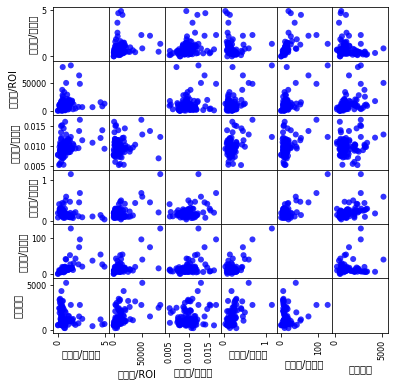

In [29]:
# 多维数据相关性分析
# 导入数据
df = jdcd[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东展位

In [30]:
data_jdzw

年份  自然周       周次  广告形式      展现量    点击量   点击率  总加购数   转化率   ROI  ...  \
0   2019   19  2019-19  京东展位   167290    801  0.48     1  0.00  0.00  ...   
1   2019   20  2019-20  京东展位   937352   3580  0.38    20  0.00  0.00  ...   
2   2019   21  2019-21  京东展位   966222   6019  0.62   104  0.15  2.00  ...   
3   2019   22  2019-22  京东展位   299539   2275  0.76    72  0.04  0.72  ...   
4   2019   23  2019-23  京东展位      116      0  0.00     0   NaN   NaN  ...   
5   2019   24  2019-24  京东展位   129684    709  0.55    30  0.00  0.00  ...   
6   2019   25  2019-25  京东展位   509007   2339  0.46    43  0.04  0.11  ...   
7   2019   26  2019-26  京东展位    69746    371  0.53     4  0.00  0.00  ...   
8   2019   27  2019-27  京东展位  1174572   5395  0.46   155  0.06  1.02  ...   
9   2019   28  2019-28  京东展位   419575   1677  0.40    76  0.18  2.32  ...   
10  2019   29  2019-29  京东展位   223274    905  0.41    23  0.00  0.00  ...   
11  2019   30  2019-30  京东展位   492316   1930  0.39    65  0.16  2.24  ...   
12  2019   31  2019-31  京东展位   225319    735  0.33     6  0.00  0.00  ...   
13  2019   32  2019-32  京东展位   997626   3669  0.37    69  0.14  1.23  ...   
14  2019   33  2019-33  京东展位   301452   1338  0.44    29  0.07  0.87  ...   
15  2019   34  2019-34  京东展位   276361    691  0.25     1  0.00  0.00  ...   
16  2019   35  2019-35  京东展位  1338939   9366  0.70    82  0.04  0.31  ...   
17  2019   36  2019-36  京东展位  2101802  16174  0.77   156  0.09  0.43  ...   
18  2019   37  2019-37  京东展位  1282116   7462  0.58   219  0.78  1.65  ...   
19  2019   38  2019-38  京东展位      475      0  0.00     7   NaN   NaN  ...   
20  2019   39  2019-39  京东展位      121      0  0.00     1   NaN   NaN  ...   
21  2019   40  2019-40  京东展位       52      0  0.00     0   NaN   NaN  ...   
22  2019   41  2019-41  京东展位       31      0  0.00     0   NaN   NaN  ...   
23  2019   43  2019-43  京东展位   183007    804  0.44    26  0.00  0.00  ...   
24  2019   44  2019-44  京东展位   434016   1539  0.35    35  0.06  0.11  ...   
25  2019   45  2019-45  京东展位   408444   1349  0.33     3  0.07  0.12  ...   
26  2019   46  2019-46  京东展位   131368    716  0.55    15  0.42  0.85  ...   
27  2019   48  2019-48  京东展位   428300    983  0.23     0  0.00  0.00  ...   
28  2019   50  2019-50  京东展位   839054   2060  0.25    13  0.15  0.31  ...   
29  2019   51  2019-51  京东展位   296296    700  0.24    10  0.00  0.00  ...   
30  2019   52  2019-52  京东展位   127853    270  0.21     7  0.74  2.09  ...   
31  2019   53  2019-53  京东展位    44232    133  0.30     3  0.00  0.00  ...   
32  2020    1   2020-1  京东展位   121566    422  0.35    15  0.00  0.00  ...   
33  2020    2   2020-2  京东展位    51981    210  0.40    12  0.00  0.00  ...   
34  2020    8   2020-8  京东展位    89098    628  0.70    43  0.00  0.00  ...   
35  2020    9   2020-9  京东展位   120054    810  0.67    66  1.36  4.12  ...   
36  2020   12  2020-12  京东展位  1393612   6590  0.47   196  0.06  0.18  ...   
37  2020   13  2020-13  京东展位   990593   4706  0.48   217  0.06  0.24  ...   
38  2020   14  2020-14  京东展位   127297    502  0.39    36  0.00  0.00  ...   
39  2020   16  2020-16  京东展位   288462   2292  0.79   131  0.52  1.53  ...   
40  2020   17  2020-17  京东展位   341901   2006  0.59   100  0.05  0.46  ...   
41  2020   18  2020-18  京东展位   243354   1194  0.49    26  0.08  0.19  ...   

    是否为展位广告  是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投    点击率/转化率       销售额/ROI  \
0         1        0        0        0        0   0.000000      0.000000   
1         1        0        0        0        0   0.000000      0.000000   
2         1        0        0        0        0   4.133333   9495.500000   
3         1        0        0        0        0  19.000000   2776.388889   
4         1        0        0        0        0        NaN           NaN   
5         1        0        0        0        0   0.000000      0.000000   
6         1        0        0        0        0  11.500000  16354.545450   
7         1        0        0        0        0   0.000000      0.000000   
8         

In [32]:
sales = []
size = len(data_jdzw)
for i in range(size):
    date_tmp = data_jdzw['周次'][i]
    if date_tmp in list(sales_jd['周次']):
        index_tmp = sales_jd[sales_jd['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdzw = pd.DataFrame(sales)
data_jdzw['销售数据'] = sales_jdzw
data_jdzw 

年份  自然周       周次  广告形式      展现量    点击量   点击率  总加购数   转化率   ROI  ...  \
0   2019   19  2019-19  京东展位   167290    801  0.48     1  0.00  0.00  ...   
1   2019   20  2019-20  京东展位   937352   3580  0.38    20  0.00  0.00  ...   
2   2019   21  2019-21  京东展位   966222   6019  0.62   104  0.15  2.00  ...   
3   2019   22  2019-22  京东展位   299539   2275  0.76    72  0.04  0.72  ...   
4   2019   23  2019-23  京东展位      116      0  0.00     0   NaN   NaN  ...   
5   2019   24  2019-24  京东展位   129684    709  0.55    30  0.00  0.00  ...   
6   2019   25  2019-25  京东展位   509007   2339  0.46    43  0.04  0.11  ...   
7   2019   26  2019-26  京东展位    69746    371  0.53     4  0.00  0.00  ...   
8   2019   27  2019-27  京东展位  1174572   5395  0.46   155  0.06  1.02  ...   
9   2019   28  2019-28  京东展位   419575   1677  0.40    76  0.18  2.32  ...   
10  2019   29  2019-29  京东展位   223274    905  0.41    23  0.00  0.00  ...   
11  2019   30  2019-30  京东展位   492316   1930  0.39    65  0.16  2.24  ...   
12  2019   31  2019-31  京东展位   225319    735  0.33     6  0.00  0.00  ...   
13  2019   32  2019-32  京东展位   997626   3669  0.37    69  0.14  1.23  ...   
14  2019   33  2019-33  京东展位   301452   1338  0.44    29  0.07  0.87  ...   
15  2019   34  2019-34  京东展位   276361    691  0.25     1  0.00  0.00  ...   
16  2019   35  2019-35  京东展位  1338939   9366  0.70    82  0.04  0.31  ...   
17  2019   36  2019-36  京东展位  2101802  16174  0.77   156  0.09  0.43  ...   
18  2019   37  2019-37  京东展位  1282116   7462  0.58   219  0.78  1.65  ...   
19  2019   38  2019-38  京东展位      475      0  0.00     7   NaN   NaN  ...   
20  2019   39  2019-39  京东展位      121      0  0.00     1   NaN   NaN  ...   
21  2019   40  2019-40  京东展位       52      0  0.00     0   NaN   NaN  ...   
22  2019   41  2019-41  京东展位       31      0  0.00     0   NaN   NaN  ...   
23  2019   43  2019-43  京东展位   183007    804  0.44    26  0.00  0.00  ...   
24  2019   44  2019-44  京东展位   434016   1539  0.35    35  0.06  0.11  ...   
25  2019   45  2019-45  京东展位   408444   1349  0.33     3  0.07  0.12  ...   
26  2019   46  2019-46  京东展位   131368    716  0.55    15  0.42  0.85  ...   
27  2019   48  2019-48  京东展位   428300    983  0.23     0  0.00  0.00  ...   
28  2019   50  2019-50  京东展位   839054   2060  0.25    13  0.15  0.31  ...   
29  2019   51  2019-51  京东展位   296296    700  0.24    10  0.00  0.00  ...   
30  2019   52  2019-52  京东展位   127853    270  0.21     7  0.74  2.09  ...   
31  2019   53  2019-53  京东展位    44232    133  0.30     3  0.00  0.00  ...   
32  2020    1   2020-1  京东展位   121566    422  0.35    15  0.00  0.00  ...   
33  2020    2   2020-2  京东展位    51981    210  0.40    12  0.00  0.00  ...   
34  2020    8   2020-8  京东展位    89098    628  0.70    43  0.00  0.00  ...   
35  2020    9   2020-9  京东展位   120054    810  0.67    66  1.36  4.12  ...   
36  2020   12  2020-12  京东展位  1393612   6590  0.47   196  0.06  0.18  ...   
37  2020   13  2020-13  京东展位   990593   4706  0.48   217  0.06  0.24  ...   
38  2020   14  2020-14  京东展位   127297    502  0.39    36  0.00  0.00  ...   
39  2020   16  2020-16  京东展位   288462   2292  0.79   131  0.52  1.53  ...   
40  2020   17  2020-17  京东展位   341901   2006  0.59   100  0.05  0.46  ...   
41  2020   18  2020-18  京东展位   243354   1194  0.49    26  0.08  0.19  ...   

    是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投    点击率/转化率       销售额/ROI   点击量/展现量  \
0         0        0        0        0   0.000000      0.000000  0.004788   
1         0        0        0        0   0.000000      0.000000  0.003819   
2         0        0        0        0   4.133333   9495.500000  0.006229   
3         0        0        0        0  19.000000   2776.388889  0.007595   
4         0        0        0        0        NaN           NaN  0.000000   
5         0        0        0        0   0.000000      0.000000  0.005467   
6         0        0        0        0  11.500000  16354.545450  0.004595   
7         0        0        0        0   0.000000      0.000000  0.005319   
8

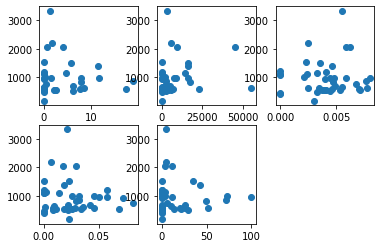

In [33]:
x1 = data_jdzw['点击率/转化率']
x2 = data_jdzw['销售额/ROI']
x3 = data_jdzw['点击量/展现量']
x4 = data_jdzw['加购数/点击量']
x5 = data_jdzw['订单数/加购数']
y = data_jdzw['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [34]:
jdzw = data_jdzw.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdzw['点击率/转化率'])
xs.append(jdzw['销售额/ROI'])
xs.append(jdzw['点击量/展现量'])
xs.append(jdzw['加购数/点击量'])
xs.append(jdzw['订单数/加购数'])
ys = jdzw['销售数据']

In [35]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.065，p值 =  0.712
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.176，p值 =  0.311
点击量/展现量 与 销售数据 的相关性分析: 相关系数r = -0.008，p值 =  0.964
加购数/点击量 与 销售数据 的相关性分析: 相关系数r = -0.160，p值 =  0.357
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.065，p值 =  0.712


- p值都大于0.05，认为无线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.394443  0.463732 -0.135334  0.765422 -0.064632
销售额/ROI  0.394443  1.000000  0.408322 -0.197373  0.174321  0.176411
点击量/展现量  0.463732  0.408322  1.000000  0.391275  0.281808 -0.007891
加购数/点击量 -0.135334 -0.197373  0.391275  1.000000  0.139393 -0.160368
订单数/加购数  0.765422  0.174321  0.281808  0.139393  1.000000 -0.064699
销售数据    -0.064632  0.176411 -0.007891 -0.160368 -0.064699  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

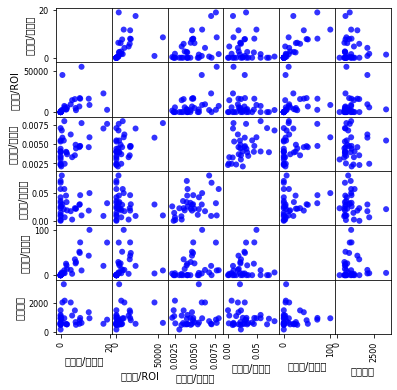

In [36]:
# 多维数据相关性分析
# 导入数据
df = jdzw[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 京东直投

In [37]:
data_jdzt

年份  自然周       周次  广告形式       展现量     点击量   点击率   总加购数   转化率    ROI  ...  \
0   2019   19  2019-19  京东直投   6007351   83060  0.01  113.0  0.02  13.20  ...   
1   2019   20  2019-20  京东直投  12600517  157422  0.01  357.0  0.04  50.20  ...   
2   2019   21  2019-21  京东直投   2529698   22876  0.01  109.0  0.07  35.94  ...   
3   2019   22  2019-22  京东直投    497920    2052  0.00   11.0  0.15  17.71  ...   
4   2019   23  2019-23  京东直投       164       0  0.00    0.0   NaN   0.00  ...   
..   ...  ...      ...   ...       ...     ...   ...    ...   ...    ...  ...   
74  2020   47  2020-47  京东直投         0       0   NaN    NaN   NaN   0.00  ...   
75  2020   48  2020-48  京东直投         0       0   NaN    NaN   NaN   0.00  ...   
76  2020   49  2020-49  京东直投         0       0   NaN    NaN   NaN   0.00  ...   
77  2021    8   2021-8  京东直投    630941   30730  0.05   51.0  0.00   0.00  ...   
78  2021    9   2021-9  京东直投   1243306   52013  0.04   69.0  0.00   6.12  ...   

    是否为展位广告  是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投   点击率/转化率      销售额/ROI  \
0         0        0        0        0        1  0.500000  2120.227273   
1         0        0        0        0        1  0.250000  2801.334661   
2         0        0        0        0        1  0.142857   992.849193   
3         0        0        0        0        1  0.000000   318.294749   
4         0        0        0        0        1       NaN     0.000000   
..      ...      ...      ...      ...      ...       ...          ...   
74        0        0        0        0        1       NaN     0.000000   
75        0        0        0        0        1       NaN     0.000000   
76        0        0        0        0        1       NaN     0.000000   
77        0        0        0        0        1  0.000000     0.000000   
78        0        0        0        0        1  0.000000    92.973856   

     点击量/展现量   加购数/点击量    订单数/加购数  
0   0.013826  0.001360   8.692308  
1   0.012493  0.002268   5.666667  
2   0.009043  0.004765   6.411765  
3   0.004121  0.005361   3.666667  
4   0.000000  0.000000   0.000000  
..       ...       ...        ...  
74  0.000000  0.000000   0.000000  
75  0.000000  0.000000   0.000000  
76  0.000000  0.000000   0.000000  
77  0.048705  0.001660   0.000000  
78  0.041834  0.001327  69.000000  

[79 rows x 23 columns]

In [38]:
sales = []
size = len(data_jdzt)
for i in range(size):
    date_tmp = data_jdzt['周次'][i]
    if date_tmp in list(sales_jd['周次']):
        index_tmp = sales_jd[sales_jd['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_jd['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_jdzt = pd.DataFrame(sales)
data_jdzt['销售数据'] = sales_jdzt
data_jdzt 

年份  自然周       周次  广告形式       展现量     点击量   点击率   总加购数   转化率    ROI  ...  \
0   2019   19  2019-19  京东直投   6007351   83060  0.01  113.0  0.02  13.20  ...   
1   2019   20  2019-20  京东直投  12600517  157422  0.01  357.0  0.04  50.20  ...   
2   2019   21  2019-21  京东直投   2529698   22876  0.01  109.0  0.07  35.94  ...   
3   2019   22  2019-22  京东直投    497920    2052  0.00   11.0  0.15  17.71  ...   
4   2019   23  2019-23  京东直投       164       0  0.00    0.0   NaN   0.00  ...   
..   ...  ...      ...   ...       ...     ...   ...    ...   ...    ...  ...   
74  2020   47  2020-47  京东直投         0       0   NaN    NaN   NaN   0.00  ...   
75  2020   48  2020-48  京东直投         0       0   NaN    NaN   NaN   0.00  ...   
76  2020   49  2020-49  京东直投         0       0   NaN    NaN   NaN   0.00  ...   
77  2021    8   2021-8  京东直投    630941   30730  0.05   51.0  0.00   0.00  ...   
78  2021    9   2021-9  京东直投   1243306   52013  0.04   69.0  0.00   6.12  ...   

    是否为触点广告  是否为海投广告  是否为快车广告  是否为京东直投   点击率/转化率      销售额/ROI   点击量/展现量  \
0         0        0        0        1  0.500000  2120.227273  0.013826   
1         0        0        0        1  0.250000  2801.334661  0.012493   
2         0        0        0        1  0.142857   992.849193  0.009043   
3         0        0        0        1  0.000000   318.294749  0.004121   
4         0        0        0        1       NaN     0.000000  0.000000   
..      ...      ...      ...      ...       ...          ...       ...   
74        0        0        0        1       NaN     0.000000  0.000000   
75        0        0        0        1       NaN     0.000000  0.000000   
76        0        0        0        1       NaN     0.000000  0.000000   
77        0        0        0        1  0.000000     0.000000  0.048705   
78        0        0        0        1  0.000000    92.973856  0.041834   

     加购数/点击量    订单数/加购数    销售数据  
0   0.001360   8.692308     NaN  
1   0.002268   5.666667     NaN  
2   0.004765   6.411765  2057.0  
3   0.005361   3.666667   863.0  
4   0.000000   0.000000   458.0  
..       ...        ...     ...  
74  0.000000   0.000000  2692.0  
75  0.000000   0.000000  2991.0  
76  0.000000   0.000000  3199.0  
77  0.001660   0.000000   970.0  
78  0.001327  69.000000  1876.0  

[79 rows x 24 columns]

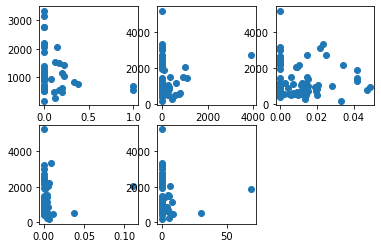

In [39]:
x1 = data_jdzt['点击率/转化率']
x2 = data_jdzt['销售额/ROI']
x3 = data_jdzt['点击量/展现量']
x4 = data_jdzt['加购数/点击量']
x5 = data_jdzt['订单数/加购数']
y = data_jdzt['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [40]:
jdzt = data_jdzt.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(jdzt['点击率/转化率'])
xs.append(jdzt['销售额/ROI'])
xs.append(jdzt['点击量/展现量'])
xs.append(jdzt['加购数/点击量'])
xs.append(jdzt['订单数/加购数'])
ys = jdzt['销售数据']

In [41]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.339，p值 =  0.169
销售额/ROI 与 销售数据 的相关性分析: 相关系数r = -0.491，p值 =  0.038
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.466，p值 =  0.051
加购数/点击量 与 销售数据 的相关性分析: 相关系数r = -0.446，p值 =  0.064
订单数/加购数 与 销售数据 的相关性分析: 相关系数r =  0.549，p值 =  0.018


- 只有两项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.491，有低度线性关系；
- “订单数/加购数”的相关系数为0.549，有中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.576340 -0.052407  0.393184  0.155369 -0.338990
销售额/ROI  0.576340  1.000000 -0.281378  0.687767  0.169506 -0.491345
点击量/展现量 -0.052407 -0.281378  1.000000 -0.121982  0.310660  0.466214
加购数/点击量  0.393184  0.687767 -0.121982  1.000000  0.332933 -0.445697
订单数/加购数  0.155369  0.169506  0.310660  0.332933  1.000000  0.549397
销售数据    -0.338990 -0.491345  0.466214 -0.445697  0.549397  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

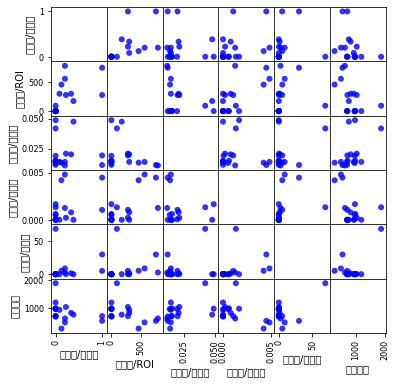

In [42]:
# 多维数据相关性分析
# 导入数据
df = jdzt[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

## 天猫

### 天猫品销宝

In [8]:
data_tmpxb

年份  自然周       周次 广告形式    展现量    点击量       点击率  总加购数       转化率     ROI  \
0   2020   44  2020-44  品销宝   2076    425  0.204720   299  0.063102   39.67   
1   2020   45  2020-45  品销宝  11354   2338  1.438391  1199  0.199052  144.00   
2   2020   46  2020-46  品销宝  14479   3151  1.539365  2067  0.191404  178.87   
3   2020   47  2020-47  品销宝  11448   2087  1.283254  1005  0.090020  115.20   
4   2020   48  2020-48  品销宝  12365   2361  1.320375   733  0.076601  128.50   
5   2020   49  2020-49  品销宝  40113  11428  4.297564  2527  0.318011  495.12   
6   2020   50  2020-50  品销宝  50276  15711  5.151782  4935  0.537184  711.24   
7   2020   51  2020-51  品销宝  41234  11538  4.708891  2703  0.311480  540.41   
8   2020   52  2020-52  品销宝  32777  10856  5.536942  2500  0.385987  570.45   
9   2020   53  2020-53  品销宝  19107   6250  3.118112  1189  0.207209  247.04   
10  2021    1   Jan-21  品销宝   3114    647  0.623239   273  0.068488   93.70   
11  2021    2   Feb-21  品销宝  10044   2143  1.485517   864  0.172612  221.73   
12  2021    3   Mar-21  品销宝   9545   2069  1.530558   850  0.158547  194.62   
13  2021    4   Apr-21  品销宝  10260   2281  1.549824  1001  0.197734  223.23   
14  2021    5   May-21  品销宝   9758   2137  1.545405   901  0.194782  189.50   
15  2021    6   Jun-21  品销宝   9453   2100  1.564143  1001  0.183727  281.67   
16  2021    7   Jul-21  品销宝   4937   1217  1.720942   577  0.113024  194.24   
17  2021    8   Aug-21  品销宝   7542   1914  1.779121   752  0.183702  346.05   
18  2021    9   Sep-21  品销宝  12439   2820  1.590521  1221  0.186836  332.72   

    ...       总费用  是否为钻展广告  是否为超级推荐广告  是否为直通车广告  是否为品销宝广告    点击率/转化率  \
0   ...   1761.00        0          0         0         1   3.244271   
1   ...  10040.97        0          0         0         1   7.226207   
2   ...  12190.75        0          0         0         1   8.042491   
3   ...   7895.74        0          0         0         1  14.255210   
4   ...   7990.27        0          0         0         1  17.237047   
5   ...  36169.84        0          0         0         1  13.513885   
6   ...  52397.73        0          0         0         1   9.590349   
7   ...  39535.35        0          0         0         1  15.117796   
8   ...  36829.22        0          0         0         1  14.344892   
9   ...  21785.87        0          0         0         1  15.048149   
10  ...   2289.10        0          0         0         1   9.099974   
11  ...   7425.11        0          0         0         1   8.606105   
12  ...   7038.99        0          0         0         1   9.653655   
13  ...   7438.44        0          0         0         1   7.837924   
14  ...   7012.80        0          0         0         1   7.934024   
15  ...   4817.98        0          0         0         1   8.513408   
16  ...   2070.96        0          0         0         1  15.226341   
17  ...   3268.33        0          0         0         1   9.684821   
18  ...   5870.93        0          0         0         1   8.512926   

        销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数  
0   1761.153012  0.204721  0.703529  2.282443  
1   1483.279514  0.205919  0.512831  3.611446  
2   2128.856488  0.217626  0.655982  4.351579  
3   1129.409722  0.182303  0.481552  6.836735  
4   1147.482335  0.190942  0.310462  5.389706  
5   1795.688884  0.284895  0.221124  3.264858  
6   2844.122097  0.312495  0.314111  3.117498  
7   1945.094909  0.279818  0.234269  3.945985  
8   1681.459427  0.331208  0.230287  3.501401  
9   2003.189848  0.327105  0.190240  3.040921  
10   757.716115  0.207771  0.421947  3.845070  
11  1088.849276  0.213361  0.403173  3.469880  
12  1039.917429  0.216763  0.410826  3.935185  
13  1065.905792  0.222320  0.438843  3.475694  
14  1020.376623  0.219000  0.421619  3.288321  
15   706.592644  0.222152  0.476667  4.036290  
16   279.398219  0.246506  0.474117  7.303797  
17   467.999162  0.253779  0.392894  3.722772  
18   825.526599  0.226706  0.432979  3.677711  

[19 rows x 22 columns]

In [9]:
sales = []
size = len(data_tmpxb)
for i in range(size):
    date_tmp = data_tmpxb['周次'][i]
    if date_tmp in list(sales_tmgq['周次']):
        index_tmp = sales_tmgq[sales_tmgq['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmpxb = pd.DataFrame(sales)
data_tmpxb['销售数据'] = sales_tmpxb
data_tmpxb

XLRDError: No sheet named <'周次'>

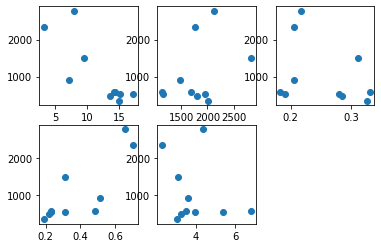

In [24]:
x1 = data_tmpxb['点击率/转化率']
x2 = data_tmpxb['销售额/ROI']
x3 = data_tmpxb['点击量/展现量']
x4 = data_tmpxb['加购数/点击量']
x5 = data_tmpxb['订单数/加购数']
y = data_tmpxb['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [25]:
tmpxb = data_tmpxb.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmpxb['点击率/转化率'])
xs.append(tmpxb['销售额/ROI'])
xs.append(tmpxb['点击量/展现量'])
xs.append(tmpxb['加购数/点击量'])
xs.append(tmpxb['订单数/加购数'])
ys = tmpxb['销售数据']

In [26]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.810，p值 =  0.004
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.391，p值 =  0.264
点击量/展现量 与 销售数据 的相关性分析: 相关系数r = -0.321，p值 =  0.366
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.822，p值 =  0.004
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.259，p值 =  0.471


- 有两项的p值都小于0.05：
- “点击率/转化率”的相关系数为0.810，有显著线性关系；
- “加购数/点击量”的相关系数为0.822，有显著线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000 -0.304628  0.295172 -0.807419  0.486045 -0.810259
销售额/ROI -0.304628  1.000000  0.618468 -0.112925 -0.601567  0.390998
点击量/展现量  0.295172  0.618468  1.000000 -0.725907 -0.548119 -0.320668
加购数/点击量 -0.807419 -0.112925 -0.725907  1.000000  0.055281  0.822149
订单数/加购数  0.486045 -0.601567 -0.548119  0.055281  1.000000 -0.258599
销售数据    -0.810259  0.390998 -0.320668  0.822149 -0.258599  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

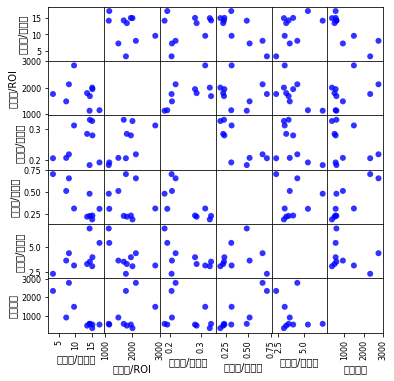

In [27]:
# 多维数据相关性分析
# 导入数据
df = tmpxb[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 天猫超级推荐

In [28]:
data_tmcjtj

年份  自然周       周次  广告形式      展现量    点击量       点击率  总加购数       转化率  \
0   2020   44  2020-44  超级推荐   181763   2851  0.149100   159  0.280800   
1   2020   45  2020-45  超级推荐  1522305  14633  0.999700   703  0.413900   
2   2020   46  2020-46  超级推荐  1568871  14717  0.444500   844  2.152000   
3   2020   47  2020-47  超级推荐  2258976  11040       NaN   449  0.185100   
4   2020   48  2020-48  超级推荐   269978   1956       NaN    90  0.070300   
5   2020   49  2020-49  超级推荐   256110   8618  0.946300   130  0.143600   
6   2020   50  2020-50  超级推荐   574530  19042  2.497600   521  0.974000   
7   2020   51  2020-51  超级推荐   235439   6400  0.515800   134  0.114900   
8   2020   52  2020-52  超级推荐   192040   4946  0.422800    99  0.166900   
9   2020   53  2020-53  超级推荐   134555   3520  0.314700    65  0.115600   
10  2021    1   Jan-21  超级推荐   742630   4657       NaN   162  0.081308   
11  2021    2   Feb-21  超级推荐  1417911   9902       NaN   278  0.127199   
12  2021    3   Mar-21  超级推荐  1197098   7721       NaN   255  0.163391   
13  2021    4   Apr-21  超级推荐  1168157   6902       NaN   283  0.380301   
14  2021    5   May-21  超级推荐  1586552   6902       NaN   238  0.302199   
15  2021    6   Jun-21  超级推荐  1291101   5371       NaN   163  0.399491   
16  2021    7   Jul-21  超级推荐  1532796   6215  0.007801   445  0.070810   
17  2021    8   Aug-21  超级推荐  1350366   6501  0.220394   200  0.140093   
18  2021    9   Sep-21  超级推荐  1013831   4628  0.229387   128  0.303900   

           ROI  ...          总费用  是否为钻展广告  是否为超级推荐广告  是否为直通车广告  是否为品销宝广告  \
0   247.965360  ...  13940.68000        0          1         0         0   
1    80.804230  ...  64439.93000        0          1         0         0   
2   636.192500  ...  56787.54000        0          1         0         0   
3   213.500570  ...  20558.48000        0          1         0         0   
4    45.699960  ...   2761.62000        0          1         0         0   
5    72.662040  ...   8024.53075        0          1         0         0   
6   398.714740  ...  38261.50592        0          1         0         0   
7    63.508970  ...  11718.34322        0          1         0         0   
8   114.206980  ...   9499.86292        0          1         0         0   
9    97.734000  ...   6000.00000        0          1         0         0   
10   50.149074  ...   9330.45000        0          1         0         0   
11  111.509711  ...  19183.74000        0          1         0         0   
12  130.573935  ...  14108.21000        0          1         0         0   
13  251.821030  ...  14612.73000        0          1         0         0   
14  328.768542  ...  13299.59000        0          1         0         0   
15  787.423866  ...   7688.69000        0          1         0         0   
16   50.947789  ...   7808.77000        0          1         0         0   
17  204.368646  ...   8289.65000        0          1         0         0   
18  535.525752  ...   7127.62000        0          1         0         0   

     点击率/转化率     销售额/ROI   点击量/展现量   加购数/点击量    订单数/加购数  
0   0.530983  211.357949  0.015685  0.055770   3.533333  
1   2.415318  512.152643  0.009612  0.048042  12.333333  
2   0.206552  399.097993  0.009381  0.057349   3.718062  
3        NaN  289.858758  0.004887  0.040670  12.472222  
4        NaN  290.202661  0.007245  0.046012   6.428571  
5   6.589833  303.721310  0.033650  0.015085   3.333333  
6   2.564271  842.791666  0.033144  0.027361   1.966038  
7   4.489121  610.433455  0.027183  0.020938   4.060606  
8   2.533253  640.387216  0.025755  0.020016   1.833333  
9   2.722318  500.000000  0.026160  0.018466   2.031250  
10       NaN  280.304278  0.006271  0.034786  12.461538  
11       NaN  283.491006  0.006984  0.028075  16.352941  
12       NaN  260.365975  0.006450  0.033027  10.200000  
13       NaN  252.634540  0.005908  0.041003   6.431818  
14       NaN  258.031987  0.004350  0.034483   6.263158  
15       NaN   58.391690  0.004160  0.030348   8.578947  
16  0.110167  203.

In [29]:
sales = []
size = len(data_tmcjtj)
for i in range(size):
    date_tmp = data_tmcjtj['周次'][i]
    if date_tmp in list(sales_tmgq['周次']):
        index_tmp = sales_tmgq[sales_tmgq['周次'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['周次'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmcjtj = pd.DataFrame(sales)
data_tmcjtj['销售数据'] = sales_tmcjtj
data_tmcjtj

ValueError: could not convert string to float: '2020-44'

In [21]:
x1 = data_tmcjtj['点击率/转化率']
x2 = data_tmcjtj['销售额/ROI']
x3 = data_tmcjtj['点击量/展现量']
x4 = data_tmcjtj['加购数/点击量']
x5 = data_tmcjtj['订单数/加购数']
y = data_tmcjtj['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

KeyError: '销售数据'

In [147]:
tmcjtj = data_tmcjtj.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmcjtj['点击率/转化率'])
xs.append(tmcjtj['销售额/ROI'])
xs.append(tmcjtj['点击量/展现量'])
xs.append(tmcjtj['加购数/点击量'])
xs.append(tmcjtj['订单数/加购数'])
ys = tmcjtj['销售数据']

In [148]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.167，p值 =  0.378
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.640，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.458，p值 =  0.011
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.099，p值 =  0.604
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.217，p值 =  0.250


- 有两项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.64，有显著线性关系；
- “点击量/展现量”的相关系数为0.458，有中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.240559 -0.071588  0.011661  0.924718 -0.166872
销售额/ROI  0.240559  1.000000  0.754678  0.473446  0.100801  0.640377
点击量/展现量 -0.071588  0.754678  1.000000  0.686806 -0.253543  0.457802
加购数/点击量  0.011661  0.473446  0.686806  1.000000  0.021291  0.098788
订单数/加购数  0.924718  0.100801 -0.253543  0.021291  1.000000 -0.216614
销售数据    -0.166872  0.640377  0.457802  0.098788 -0.216614  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

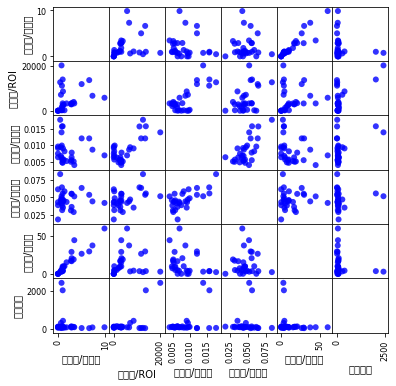

In [174]:
# 多维数据相关性分析
# 导入数据
df = tmcjtj[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 天猫直通车

In [140]:
data_tmztc

日期 广告形式   点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数
0    2020/11/1  直通车  0.162022  22504.73  0.010439  0.143889  2.233184
1    2020/11/2  直通车  0.349156  19153.54  0.012375  0.110117  3.106796
2    2020/11/3  直通车  0.278500  19945.29  0.011978  0.099803  2.320611
3    2020/11/4  直通车  0.409739  17238.42  0.012633  0.089525  2.903614
4    2020/11/5  直通车  0.367981  17635.33  0.010753  0.091270  3.123457
..         ...  ...       ...       ...       ...       ...       ...
114  2021/2/24  直通车  0.504911   4850.20  0.017825  0.086207  2.441860
115  2021/2/25  直通车  0.466628   5038.82  0.015629  0.090909  2.714286
116  2021/2/26  直通车  0.610454   4833.74  0.016388  0.096477  3.593750
117  2021/2/27  直通车  0.378001   4249.11  0.010070  0.103711  3.892857
118  2021/2/28  直通车  0.562433   4459.03  0.010444  0.084494  4.550000

[119 rows x 7 columns]

In [149]:
sales = []
size = len(data_tmztc)
for i in range(size):
    date_tmp = data_tmztc['日期'][i]
    if date_tmp in list(sales_tmgq['日期']):
        index_tmp = sales_tmgq[sales_tmgq['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmztc = pd.DataFrame(sales)
data_tmztc['销售数据'] = sales_tmztc
data_tmztc

日期 广告形式   点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数    销售数据
0    2020/11/1  直通车  0.162022  22504.73  0.010439  0.143889  2.233184  2020.0
1    2020/11/2  直通车  0.349156  19153.54  0.012375  0.110117  3.106796   295.0
2    2020/11/3  直通车  0.278500  19945.29  0.011978  0.099803  2.320611   408.0
3    2020/11/4  直通车  0.409739  17238.42  0.012633  0.089525  2.903614    68.0
4    2020/11/5  直通车  0.367981  17635.33  0.010753  0.091270  3.123457    59.0
..         ...  ...       ...       ...       ...       ...       ...     ...
114  2021/2/24  直通车  0.504911   4850.20  0.017825  0.086207  2.441860   183.0
115  2021/2/25  直通车  0.466628   5038.82  0.015629  0.090909  2.714286   118.0
116  2021/2/26  直通车  0.610454   4833.74  0.016388  0.096477  3.593750   105.0
117  2021/2/27  直通车  0.378001   4249.11  0.010070  0.103711  3.892857    51.0
118  2021/2/28  直通车  0.562433   4459.03  0.010444  0.084494  4.550000    49.0

[119 rows x 8 columns]

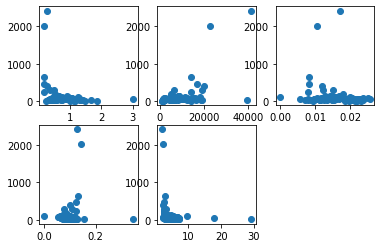

In [150]:
x1 = data_tmztc['点击率/转化率']
x2 = data_tmztc['销售额/ROI']
x3 = data_tmztc['点击量/展现量']
x4 = data_tmztc['加购数/点击量']
x5 = data_tmztc['订单数/加购数']
y = data_tmztc['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [151]:
tmztc = data_tmztc.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmztc['点击率/转化率'])
xs.append(tmztc['销售额/ROI'])
xs.append(tmztc['点击量/展现量'])
xs.append(tmztc['加购数/点击量'])
xs.append(tmztc['订单数/加购数'])
ys = tmztc['销售数据']

In [152]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.260，p值 =  0.005
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.561，p值 =  0.000
点击量/展现量 与 销售数据 的相关性分析: 相关系数r = -0.090，p值 =  0.337
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.192，p值 =  0.040
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.164，p值 =  0.081


- 有三项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.561，有显著线性关系；
- “点击量/展现量”的相关系数为-0.090，可以认为无线性关系；
- “加购数/点击量”的相关系数为0.192，可以认为无线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000 -0.452461  0.500970  0.037459  0.676748 -0.260214
销售额/ROI -0.452461  1.000000 -0.446266  0.226347 -0.159599  0.560602
点击量/展现量  0.500970 -0.446266  1.000000  0.104506  0.082327 -0.090337
加购数/点击量  0.037459  0.226347  0.104506  1.000000  0.606858  0.191923
订单数/加购数  0.676748 -0.159599  0.082327  0.606858  1.000000 -0.163606
销售数据    -0.260214  0.560602 -0.090337  0.191923 -0.163606  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

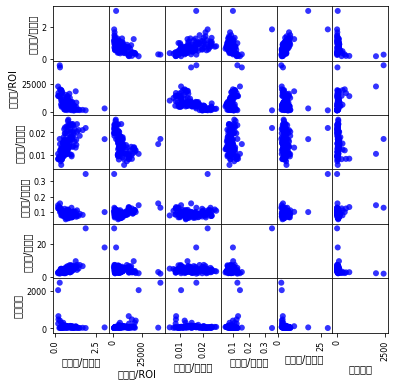

In [175]:
# 多维数据相关性分析
# 导入数据
df = tmztc[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

### 天猫钻展

In [153]:
data_tmzz

日期 广告形式    点击率/转化率      销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数
0   2020/11/1   钻展   2.090611  15709.15709  0.028230  0.029257  2.166667
1   2020/11/2   钻展   3.716414  12177.93890  0.024736  0.022952  3.448276
2   2020/11/3   钻展   3.056792   7254.89514  0.025679  0.014001  1.666667
3   2020/11/4   钻展  13.596562   4973.12377  0.028023  0.011542  5.600000
4   2020/11/5   钻展  26.877702   5000.00000  0.030009  0.006699  6.000000
..        ...  ...        ...          ...       ...       ...       ...
81  2021/2/23   钻展        NaN          NaN  0.000000  0.000000  0.000000
82  2021/2/24   钻展        NaN          NaN  0.000000  0.000000  0.000000
83  2021/2/25   钻展        NaN          NaN  0.000000  0.000000  0.000000
84  2021/2/26   钻展        NaN          NaN  0.000000  0.000000  0.000000
85  2021/2/27   钻展        NaN          NaN  0.000000  0.000000  0.000000

[86 rows x 7 columns]

In [154]:
sales = []
size = len(data_tmzz)
for i in range(size):
    date_tmp = data_tmzz['日期'][i]
    if date_tmp in list(sales_tmgq['日期']):
        index_tmp = sales_tmgq[sales_tmgq['日期'] == date_tmp].index.tolist()[0]
        sales_tmp = sales_tmgq['合计'][index_tmp]
        sales_tmp = float(sales_tmp)
    else:
        sales_tmp = np.nan
    sales.append(sales_tmp)
sales_tmzz = pd.DataFrame(sales)
data_tmzz['销售数据'] = sales_tmzz
data_tmzz

日期 广告形式    点击率/转化率      销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数  \
0   2020/11/1   钻展   2.090611  15709.15709  0.028230  0.029257  2.166667   
1   2020/11/2   钻展   3.716414  12177.93890  0.024736  0.022952  3.448276   
2   2020/11/3   钻展   3.056792   7254.89514  0.025679  0.014001  1.666667   
3   2020/11/4   钻展  13.596562   4973.12377  0.028023  0.011542  5.600000   
4   2020/11/5   钻展  26.877702   5000.00000  0.030009  0.006699  6.000000   
..        ...  ...        ...          ...       ...       ...       ...   
81  2021/2/23   钻展        NaN          NaN  0.000000  0.000000  0.000000   
82  2021/2/24   钻展        NaN          NaN  0.000000  0.000000  0.000000   
83  2021/2/25   钻展        NaN          NaN  0.000000  0.000000  0.000000   
84  2021/2/26   钻展        NaN          NaN  0.000000  0.000000  0.000000   
85  2021/2/27   钻展        NaN          NaN  0.000000  0.000000  0.000000   

      销售数据  
0   2020.0  
1    295.0  
2    408.0  
3     68.0  
4     59.0  
..     ...  
81    53.0  
82   183.0  
83   118.0  
84   105.0  
85    51.0  

[86 rows x 8 columns]

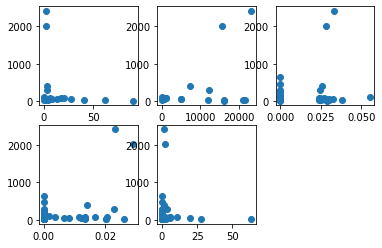

In [155]:
x1 = data_tmzz['点击率/转化率']
x2 = data_tmzz['销售额/ROI']
x3 = data_tmzz['点击量/展现量']
x4 = data_tmzz['加购数/点击量']
x5 = data_tmzz['订单数/加购数']
y = data_tmzz['销售数据']

#plt.figure(1)
plt.subplot(2, 3, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.scatter(x1,y)
plt.subplot(2, 3, 2)
plt.scatter(x2,y)
plt.subplot(2, 3, 3)
plt.scatter(x3,y)
plt.subplot(2, 3, 4)
plt.scatter(x4,y)
plt.subplot(2, 3, 5)
plt.scatter(x5,y)

In [156]:
tmzz = data_tmzz.dropna(axis=0,how='any')  # 删去缺失值所在行
xs = []
colnames = ['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数']
xs.append(tmzz['点击率/转化率'])
xs.append(tmzz['销售额/ROI'])
xs.append(tmzz['点击量/展现量'])
xs.append(tmzz['加购数/点击量'])
xs.append(tmzz['订单数/加购数'])
ys = tmzz['销售数据']

In [157]:
for i in range(5):
    r,p = stats.pearsonr(xs[i],ys)  # 相关系数和P值
    print(colnames[i],end = ' 与 销售数据 的相关性分析: ')
    print('相关系数r = %6.3f，p值 = %6.3f'%(r,p))

点击率/转化率 与 销售数据 的相关性分析: 相关系数r = -0.252，p值 =  0.298
销售额/ROI 与 销售数据 的相关性分析: 相关系数r =  0.457，p值 =  0.049
点击量/展现量 与 销售数据 的相关性分析: 相关系数r =  0.054，p值 =  0.825
加购数/点击量 与 销售数据 的相关性分析: 相关系数r =  0.485，p值 =  0.035
订单数/加购数 与 销售数据 的相关性分析: 相关系数r = -0.191，p值 =  0.433


- 有两项的p值都小于0.05，其中：
- “销售额/ROI”的相关系数为0.457，有中度线性关系；
- “点击量/展现量”的相关系数为-0.485，有中度线性关系。

          点击率/转化率   销售额/ROI   点击量/展现量   加购数/点击量   订单数/加购数      销售数据
点击率/转化率  1.000000  0.243670 -0.125243 -0.024439  0.953688 -0.251750
销售额/ROI  0.243670  1.000000 -0.016817  0.699437  0.299753  0.457401
点击量/展现量 -0.125243 -0.016817  1.000000 -0.326913 -0.118369  0.054350
加购数/点击量 -0.024439  0.699437 -0.326913  1.000000  0.142154  0.485369
订单数/加购数  0.953688  0.299753 -0.118369  0.142154  1.000000 -0.191240
销售数据    -0.251750  0.457401  0.054350  0.485369 -0.191240  1.000000


D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\new_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from c

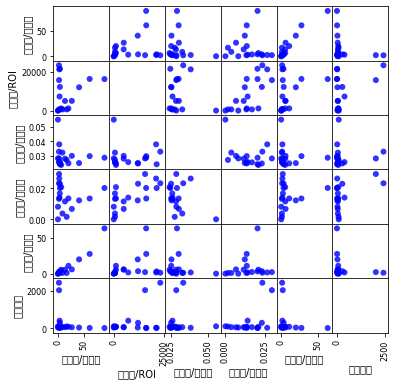

In [176]:
# 多维数据相关性分析
# 导入数据
df = tmzz[['点击率/转化率','销售额/ROI','点击量/展现量','加购数/点击量','订单数/加购数','销售数据']]
# 相关性计算
print(df.corr())
# 绘图
fig = pd.plotting.scatter_matrix(df,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()